In [48]:
import pandas as pd 
import numpy
import matplotlib.pyplot as plt
import os

# The four CSV files containing daily ridership numbers for citi bike in 2018
Q1=pd.read_csv('CitiDataQ12018.csv', low_memory=False)
Q2=pd.read_csv('CitiDataQ22018.csv', low_memory=False)
Q3=pd.read_csv('CitiDataQ32018.csv', low_memory=False)
Q4=pd.read_csv('CitiDataQ42018.csv', low_memory=False)

# The CSV file containing the yearly citibike riders from 2013-2017
bikeRidersOne=pd.read_csv('BikesharingStats1.csv', low_memory= False)

# Merging the four CSV's together into one dataframe called Year.
year = pd.concat([Q1,Q2,Q3,Q4])

# Calculating the sum of all columns in the Year Dataframe
fullSum = year.sum(axis = 0, skipna = True)

#Specifing the sum of DailyTrips and assigning it to the TripSum2018 variable
tripSum2018 = fullSum.DailyTrips

# The CSV file containing the miles of protected bikelanes added from 2010-2018
currentMOPB=pd.read_csv('MOPB.csv', low_memory=False)

# Formatting the sum of Daily Trips to match the format in the BikeRiders Dataframe (17.5)million 
newSum = tripSum2018/1000000

# Formatting the percent change of riders for 2018
newPercent = ((newSum - 16.4)/16.4) * 100

bikeRidersTwo = bikeRidersOne.append({'Year':2018, 'CitiBike Ridership in Millions':newSum, 'Percent Change of Riders':newPercent}, ignore_index = True)
bikeRidersTwo.dropna()

#bikeData = pd.DataFrame(bikeRiders2.dropna())

#MOPB

,Year,CitiBike Ridership in Millions,Percent Change of Riders
0,2013.0,6.400000,0.000000
1,2014.0,8.000000,25.000000
2,2015.0,10.400000,30.000000
3,2016.0,14.600000,40.400000
4,2017.0,16.400000,12.300000
5,2018.0,17.593918,7.279988


In [145]:
#Creating the merged dataframe based on Year
import pandas as pd 

currentTrend = pd.merge(bikeRidersTwo, currentMOPB, on="Year")
currentTrend

,Year,CitiBike Ridership in Millions,Percent Change of Riders,Miles of Protected Bike Lane,Percent Change of Miles
0,2013.0,6.400000,0.000000,36.4,14.84
1,2014.0,8.000000,25.000000,41.8,29.67
2,2015.0,10.400000,30.000000,54.2,34.13
3,2016.0,14.600000,40.400000,72.7,34.25
4,2017.0,16.400000,12.300000,97.6,20.49
5,2018.0,17.593918,7.279988,117.6,85.03


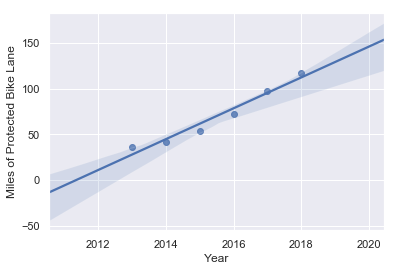

In [50]:
#First graph depicting the percent change over years in adding new miles of Protected Bike Lane
import seaborn as sns

sns.set(style="darkgrid")
sns.regplot(x="Year", y="Miles of Protected Bike Lane", data = currentTrend)

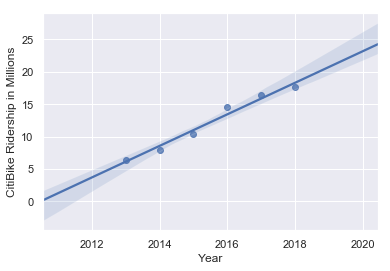

In [51]:
#Second graph depicting the increase in ridership over years for CitiBike 
import seaborn as sns

sns.set(style="darkgrid")
sns.regplot(x="Year", y="CitiBike Ridership in Millions", data = currentTrend)

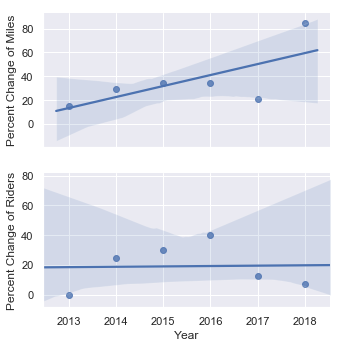

In [160]:
#Third graph depicting the trend and correlation between bike ridership and added miles of protected bike lane
import seaborn as sns

sns.set(style="darkgrid")
#sns.lmeplot(x="Percent Change of Miles", y="Percent Change of Riders", hue = "Year", legend="full", data=currentTrend);
sns.pairplot(x_vars = "Year", y_vars = ('Percent Change of Miles', 'Percent Change of Riders'), kind = "reg", aspect = 2,
             palette="husl", data = currentTrend)

In [178]:
#Creating the data frame for future trend analysis
import pandas as pd 
import numpy
import matplotlib.pyplot as plt
import os

#Reading in the csv containing future protected bike lane miles added
futureMOPB = pd.read_csv('MOPB2.csv', low_memory=False)

#Reading in the csv containing future trends created in excel
futureBikeTrend = pd.read_csv('BikesharingStats2.csv', low_memory = False)

#Adds on the futureMOPB to the currentTrend dataframe for analysis of future trends
futureTrend = pd.merge(futureMOPB,futureBikeTrend, on="Year")
#futureTrend.fillna(0)

fullTrend = currentTrend.append(futureTrend, ignore_index=True, sort= True)
fullTrend


,CitiBike Ridership in Millions,Miles of Protected Bike Lane,Percent Change of Miles,Percent Change of Riders,Year
0,6.400000,36.4,14.84,0.000000,2013.0
1,8.000000,41.8,29.67,25.000000,2014.0
2,10.400000,54.2,34.13,30.000000,2015.0
3,14.600000,72.7,34.25,40.400000,2016.0
4,16.400000,97.6,20.49,12.300000,2017.0
5,17.593918,117.6,85.03,7.279988,2018.0
6,20.800000,217.6,45.96,18.100000,2019.0
7,23.200000,317.6,31.49,11.700000,2020.0
8,25.600000,417.6,23.95,10.500000,2021.0
9,28.100000,517.6,19.32,9.500000,2022.0


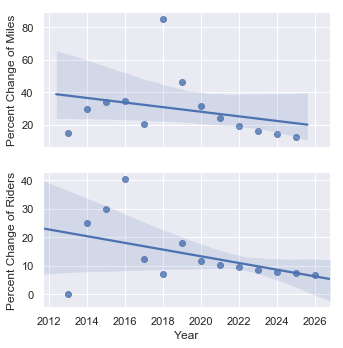

In [179]:
#Fourth graph depicting future trends when factoring in additional miles added until 2026
import seaborn as sns

sns.set(style="darkgrid")
sns.pairplot(x_vars = "Year", y_vars = ('Percent Change of Miles', 'Percent Change of Riders'), kind = "reg", aspect = 2,
             palette="husl", data = fullTrend)